<a href="https://colab.research.google.com/github/DaveOkpare/BCG_ChurnPrediction/blob/main/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset - Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The project focuses on the soccer database comes from
Kaggle and it iss well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

* The database is stored in a SQLite database. I have extracted the dataset using the [OpenDataset](https://github.com/JovianML/opendatasets) library which downloads the dataset from Kaggle. 

  You can obtain API token from [Kaggle](https://kaggle.com/) to download the dataset from this notebook.

* Related tables in the dataset are merged together using SQL joins. 

* Some column titles should be self-explanatory, and others
you’ll have to look up the [dataset source](https://www.kaggle.com/hugomathien/soccer) for more information.


### Question(s) for Analysis

1. Which players are the best penalty takers?

2. Which attributes determine (correlate) with a player's penalty taking ability?

3. Which leagues scored the most home goals or most away goals?

4. Which teams have the most wins?


In [ ]:
# Install opendatasets to download dataset from Kaggle.
!pip install opendatasets

In [ ]:
# Import opendatasets and download download dataset from Kaggle.
import opendatasets as od

od.download('https://www.kaggle.com/datasets/hugomathien/soccer')

In [3]:
# Import libraries
%matplotlib inline

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

<a id='wrangling'></a>
## Data Wrangling

In [4]:
# Load data from SQLite and print out table names.
dbcon = sqlite3.connect('./soccer/database.sqlite')
tables = list(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])

print(tables)

['sqlite_sequence', 'Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes']


In [5]:
# Join tables and select columns for analysis
player_query = """
SELECT 
pl.player_api_id, player_name, pl.player_fifa_api_id, birthday, height, weight, 
date, overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate,
crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve,
free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility,
reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression,	
interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle,
gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes
 FROM Player pl
JOIN Player_Attributes pla
ON pl.player_api_id = pla.player_api_id 
"""

In [6]:
# Create dataframe using pd.read_sql_query
player_df = pd.read_sql_query(player_query, dbcon)

In [7]:
# Overview of Player dataframe
player_df.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
# Player dataframe size
player_df.shape

(183978, 45)

In [9]:
# Player dataframe stats
player_df.describe()

,player_api_id,player_fifa_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,135900.617324,165636.285936,181.878872,168.776245,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,136927.840510,53856.899802,6.394818,15.088920,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2625.000000,2.000000,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34763.000000,155681.000000,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,77741.000000,183471.000000,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,191080.000000,199843.750000,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,750584.000000,234141.000000,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [10]:
# Info on column's datatypes and non-null count
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183978 non-null  int64  
 1   player_name          183978 non-null  object 
 2   player_fifa_api_id   183978 non-null  int64  
 3   birthday             183978 non-null  object 
 4   height               183978 non-null  float64
 5   weight               183978 non-null  int64  
 6   date                 183978 non-null  object 
 7   overall_rating       183142 non-null  float64
 8   potential            183142 non-null  float64
 9   preferred_foot       183142 non-null  object 
 10  attacking_work_rate  180748 non-null  object 
 11  defensive_work_rate  183142 non-null  object 
 12  crossing             183142 non-null  float64
 13  finishing            183142 non-null  float64
 14  heading_accuracy     183142 non-null  float64
 15  short_passing    

In [11]:
# Percentage of missing values from dataset
player_df.isna().sum() / player_df.shape[0] * 100

player_api_id          0.000000
player_name            0.000000
player_fifa_api_id     0.000000
birthday               0.000000
height                 0.000000
weight                 0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_sho

In [12]:
# Number of duplicated values 
player_df.duplicated().sum()

1

In [13]:
player_df[player_df.duplicated()]

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
84924,32968,John Potter,51384,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
player_df.query('player_api_id == 32968 & date == "2007-02-22 00:00:00"')

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
84698,32968,John Potter,51384,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,74.0,76.0,right,None,3,52.0,77.0,64.0,46.0,63.0,61.0,54.0,67.0,24.0,66.0,74.0,81.0,64.0,62.0,75.0,69.0,87.0,89.0,82.0,68.0,24.0,64.0,84.0,62.0,67.0,22.0,24.0,44.0,20.0,20.0,24.0,12.0,19.0
84923,32968,John Potter,51384,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84924,32968,John Potter,51384,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**Some issues with `player_df` dataframe:**

*   Incorrect datatypes. `Date` needs to be converted to datetime
*   Some columns have a small percentage of missing data. We can fill them with the mean values.
*   Dataframe contains duplicate values. 



In [16]:
# Join tables and select columns for analysis
team_query = """
SELECT 
tm.team_api_id, tm.team_fifa_api_id, team_long_name, team_short_name, date, buildUpPlaySpeed, 
buildUpPlaySpeedClass, buildUpPlayDribbling, buildUpPlayDribblingClass, buildUpPlayPassing, 	
buildUpPlayPassingClass, buildUpPlayPositioningClass, chanceCreationPassing, 
chanceCreationPassingClass, chanceCreationCrossing, chanceCreationCrossingClass, 
chanceCreationShooting, chanceCreationShootingClass, chanceCreationPositioningClass, 
defencePressure, defencePressureClass, defenceAggression, defenceAggressionClass, 
defenceTeamWidth, defenceTeamWidthClass, defenceDefenderLineClass
 FROM Team tm
JOIN Team_Attributes tma
ON tm.team_api_id = tma.team_api_id
"""

In [17]:
# Create dataframe using pd.read_sql_query
team_df = pd.read_sql_query(team_query, dbcon)

In [18]:
# Overview on Team dataframe
team_df.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,434,FC Aarau,AAR,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,434,FC Aarau,AAR,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,434,FC Aarau,AAR,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,77,Aberdeen,ABE,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,77,Aberdeen,ABE,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [19]:
# Info on column's datatypes and non-null count
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_api_id                     1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_long_name                  1458 non-null   object 
 3   team_short_name                 1458 non-null   object 
 4   date                            1458 non-null   object 
 5   buildUpPlaySpeed                1458 non-null   int64  
 6   buildUpPlaySpeedClass           1458 non-null   object 
 7   buildUpPlayDribbling            489 non-null    float64
 8   buildUpPlayDribblingClass       1458 non-null   object 
 9   buildUpPlayPassing              1458 non-null   int64  
 10  buildUpPlayPassingClass         1458 non-null   object 
 11  buildUpPlayPositioningClass     1458 non-null   object 
 12  chanceCreationPassing           14

In [20]:
# Number of missing values from dataset
team_df.isna().sum()

team_api_id                         0
team_fifa_api_id                    0
team_long_name                      0
team_short_name                     0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [21]:
team_df.duplicated().sum()

1

In [22]:
team_df[team_df.duplicated()]

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
860,9996,111560,Royal Excel Mouscron,MOU,2015-09-10 00:00:00,50,Balanced,50.0,Normal,50,Mixed,Organised,50,Normal,50,Normal,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover



**Some issues with `team_df` dataframe:**

*   Incorrect datatypes. `Date` needs to be converted to datetime
*   `buildUpPlayDribbling` contains a lot of missing data. We would drop the column.
*   Dataframe has duplicate values. 

In [30]:
match_query = """
WITH home_team AS (SELECT t.team_long_name as home_team, m.id id_t
FROM team t
JOIN match m
ON m.home_team_api_id=t.team_api_id),
away_team AS (SELECT t.team_long_name as away_team, m.id id_t
FROM team t
JOIN match m
ON m.away_team_api_id=t.team_api_id)
SELECT m.date date_match, m.season, l.name league, ht.home_team,
a_t.away_Team, m.home_team_goal home_goal, m.away_team_goal away_goal
FROM League as l
JOIN match m
ON l.id = m.league_id
JOIN home_team ht
ON ht.id_t=m.id
JOIN away_team a_t
ON a_t.id_t=m.id
ORDER BY date_match
"""

match_df = pd.read_sql_query(match_query, dbcon)

In [31]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_match  25979 non-null  object
 1   season      25979 non-null  object
 2   league      25979 non-null  object
 3   home_team   25979 non-null  object
 4   away_team   25979 non-null  object
 5   home_goal   25979 non-null  int64 
 6   away_goal   25979 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [32]:
match_df.head()

,date_match,season,league,home_team,away_team,home_goal,away_goal
0,2008-07-18 00:00:00,2008/2009,Switzerland Super League,BSC Young Boys,FC Basel,1,2
1,2008-07-19 00:00:00,2008/2009,Switzerland Super League,FC Aarau,FC Sion,3,1
2,2008-07-20 00:00:00,2008/2009,Switzerland Super League,FC Luzern,FC Vaduz,1,2
3,2008-07-20 00:00:00,2008/2009,Switzerland Super League,Neuchâtel Xamax,FC Zürich,1,2
4,2008-07-23 00:00:00,2008/2009,Switzerland Super League,FC Basel,Grasshopper Club Zürich,1,0


In [33]:
match_df.isna().sum()

date_match    0
season        0
league        0
home_team     0
away_team     0
home_goal     0
away_goal     0
dtype: int64

In [34]:
match_df.duplicated().sum()

0


**Observations on `match_df` dataframe:**

*   Incorrect datatypes. `date_match` needs to be converted to datetime
* It contains no missing values or duplicates


### Data Cleaning
 

In [38]:
# Fixing datetime datatype
player_df['birthday'] = pd.to_datetime(player_df['birthday'])
player_df['date'] = pd.to_datetime(player_df['date'])
team_df['date'] = pd.to_datetime(team_df['date'])
match_df['date_match'] = pd.to_datetime(match_df['date_match'])

In [ ]:
# Dropping duplicates
player_df.drop(index=[84923, 84924], inplace=True)
team_df.drop_duplicates(inplace=True)

In [28]:
# Dropping missing values
team_df.dropna(axis='columns', inplace=True)

In [151]:
match_df

,date_match,season,league,home_team,away_team,home_goal,away_goal,winning_team
0,2008-07-18,2008/2009,Switzerland Super League,BSC Young Boys,FC Basel,1,2,FC Basel
1,2008-07-19,2008/2009,Switzerland Super League,FC Aarau,FC Sion,3,1,FC Aarau
2,2008-07-20,2008/2009,Switzerland Super League,FC Luzern,FC Vaduz,1,2,FC Vaduz
3,2008-07-20,2008/2009,Switzerland Super League,Neuchâtel Xamax,FC Zürich,1,2,FC Zürich
4,2008-07-23,2008/2009,Switzerland Super League,FC Basel,Grasshopper Club Zürich,1,0,FC Basel
...,...,...,...,...,...,...,...,...
25974,2016-05-25,2015/2016,Switzerland Super League,FC Basel,Grasshopper Club Zürich,0,1,Grasshopper Club Zürich
25975,2016-05-25,2015/2016,Switzerland Super League,Lugano,FC St. Gallen,3,0,Lugano
25976,2016-05-25,2015/2016,Switzerland Super League,FC Luzern,FC Sion,2,2,None
25977,2016-05-25,2015/2016,Switzerland Super League,FC Thun,BSC Young Boys,0,3,BSC Young Boys


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Which players have the best penalties attributes? 

In [124]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
best_penalty_takers = player_df.groupby('player_name').mean()['penalties'].sort_values(ascending=False).head(10)
best_penalty_takers

player_name
Paolo Maldini         92.000000
Dario Smoje           89.750000
Mario Balotelli       89.565217
Francesco Totti       89.550000
David Villa           89.166667
Roy Makaay            88.166667
Zlatan Ibrahimovic    88.000000
Timmy Simons          87.607143
Adrian Mutu           87.333333
Michael Ballack       87.200000
Name: penalties, dtype: float64

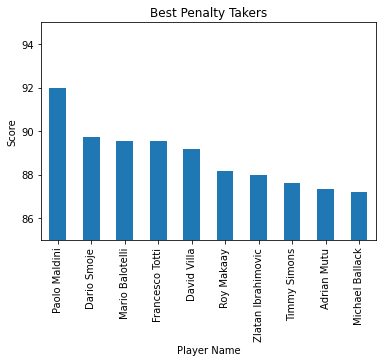

In [125]:
best_penalty_takers.plot(kind='bar', rot=90)
plt.ylim(85, 95)
plt.title('Best Penalty Takers')
plt.xlabel("Player Name")
plt.ylabel("Score");

### Which attributes influences penalties attributes? 

In [126]:
correlation = player_df.groupby('player_name').mean().reset_index().corr()

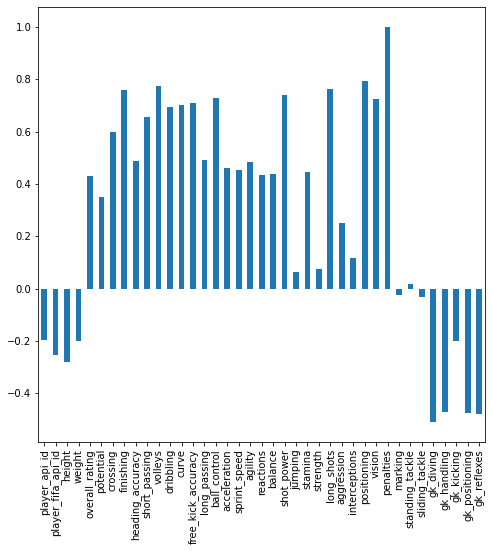

In [127]:
correlation['penalties'].plot(kind='bar', figsize=(8,8));

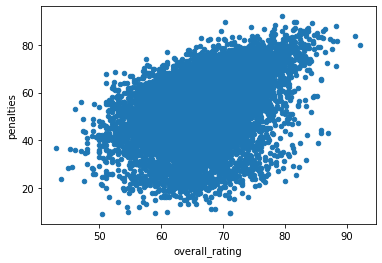

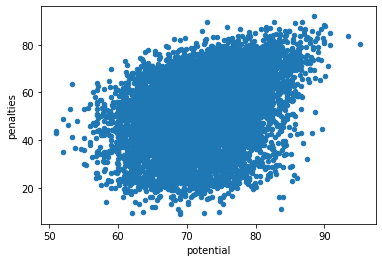

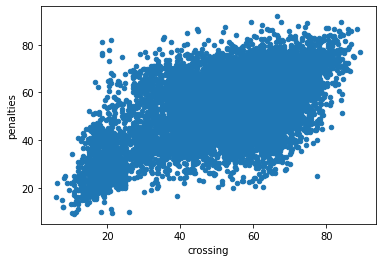

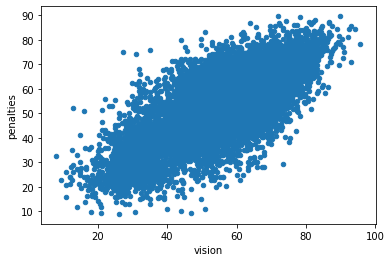

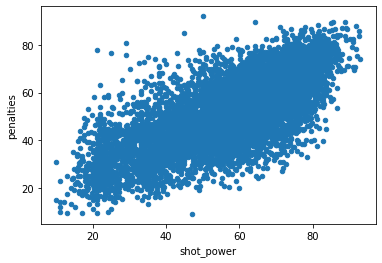

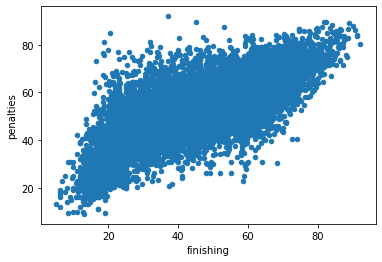

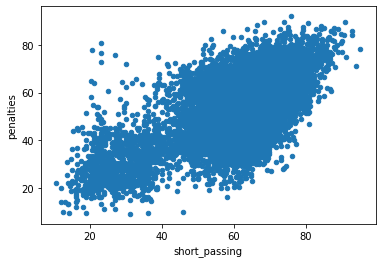

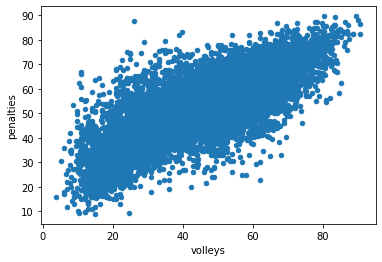

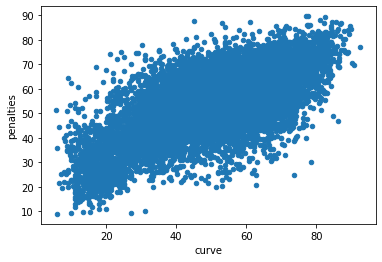

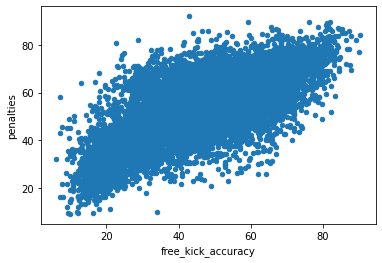

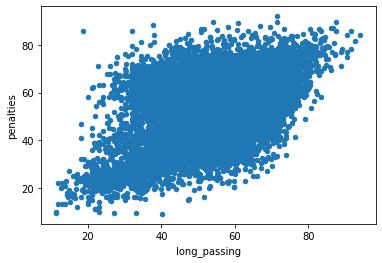

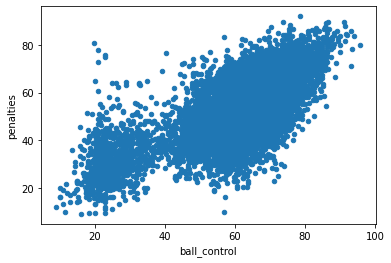

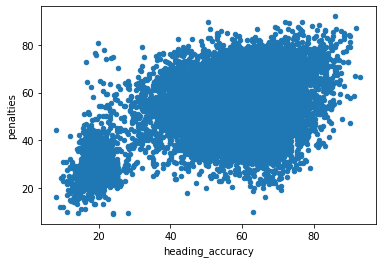

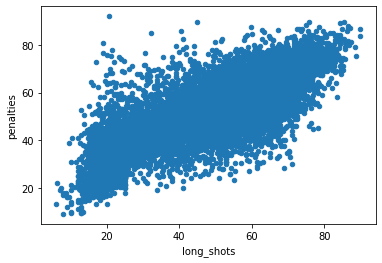

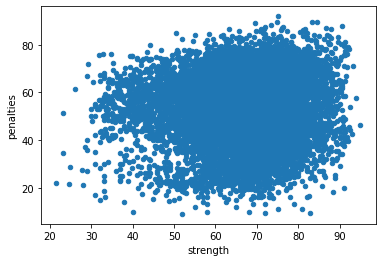

In [128]:
related_attributes = ['overall_rating', 'potential', 'crossing', 'vision', 
                      'shot_power', 'finishing', 'short_passing', 'volleys', 
                      'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 
                      'heading_accuracy', 'long_shots', 'strength'
                      ]
for i, col in enumerate(related_attributes):
  player_df.groupby('player_name').mean().plot(kind='scatter', x=col, y='penalties')


### Which league have the most goal scored?

---



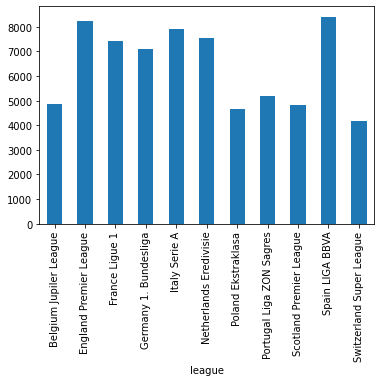

In [129]:
match_df.groupby(['league']).sum().sum(axis=1).plot(kind='bar')

### And which leagues have the most home goals or most away goals?

In [130]:
total_goals = match_df.groupby(['league']).sum().sum(axis=1).sum()

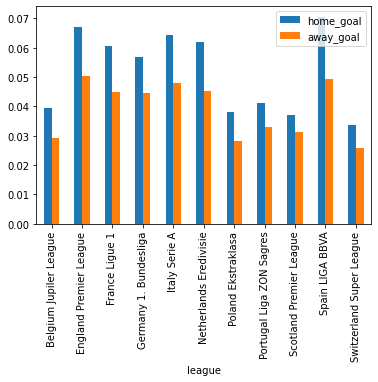

In [131]:
(match_df.groupby(['league']).sum() / total_goals).plot(kind='bar')

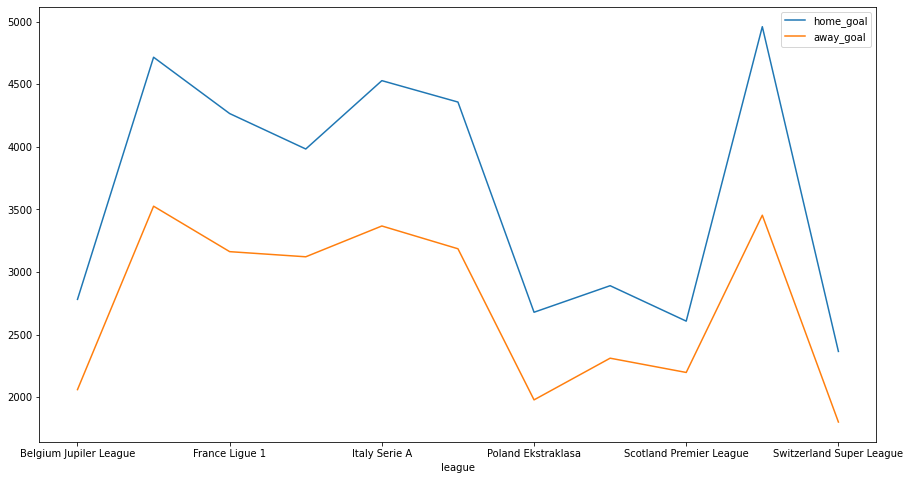

In [163]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
match_df.groupby(['league']).sum().plot(figsize=(15,8));

### Which teams have the most win?

In [37]:
conditions = [
              match_df['home_goal'] > match_df['away_goal'],
              match_df['home_goal'] < match_df['away_goal']
]

winner = [match_df['home_team'], match_df['away_team']]

match_df['winning_team'] = np.select(conditions, winner, default=None)

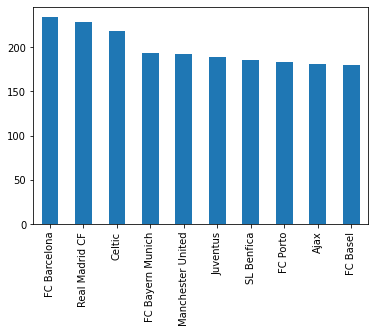

In [158]:
match_df['winning_team'].value_counts(ascending=False).head(10).plot(kind='bar')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])